


uoa-logo.svg



COMPSYS 306 Artificial Intelligence and Machine Learning 

#<center> **COMPSYS 306 Artificial Intelligence and Machine Learning**
#<center> *Department of Electrical, Computer, and Software Engineering*
<center> The University of Auckland, New Zealand


<center>Waleed Abdulla, Kevin I-Kai Wang and Felix Marattukalam 


**Lab 5: 	Understanding and Implementation of Unsupervised Classifiers**


  


In [ ]:
#Note: Changing the the sign-off time here will make no difference to the actual sign-off time! But, feel free to change it here for visual satisfaction!  
%%html
<marquee style='width: 30%; color: red;'><b>Lab Start: Week 8: Sep 19 , 2022 -----> Lab Sign-off: Week 8: on September 23, 2022 (2:00 pm) </b></marquee>

**Prerequisites:**

- Completion of Labs 1 to 4 with signoff from TA/GTA also ensuring the (.ipynb) notebook with all your answers are uploaded to Canvas.
- Sound knowledge of Supervised Machine Learning Methods.
- Keen interest to learn about Artificial Intelligence (AI) and Machine Learning (ML).


*   There are many unsupervised methods in machine learning that can be used in the absence of target labels.
*   Some of them are classifiers, which help label the data points into specific groups, whereas some help with pre-processing, an important step necessary before inputting data into a classifier.
*   Almost all unsupervised methods are based on distance or distribution of the data .


In this last lab, we will look at a few unsupervised machine learning algorithms including K-Means clustering, Principal component analysis (PCA), and Gaussian Mixture Modelling clustering (GMM). 

**Step 1: K-Means Clustering**

- So what is a cluster of data points?

A cluster is a collection of data points aggregated together because of certain similarities.

In K-Means clustering method, a target number *K* is defined, which refers to the number of centroids needed in the dataset. A centroid is the location representing the center of the cluster that has been identified. Every data point is allocated to one of the clusters through finding the shortest distance to the cluster center (or centroid).


 - Working of K-Means clustering 

To process the  data, the K-means algorithm starts first with *K* randomly selected centroids, and then performs iterative calculations to optimize the positions of the centroids. 

The algorithm halts updating and optimizing clusters when the centroids have stabilized — i.e. there is no change in their values because the clustering has been successful or when the defined number of iterations has been achieved.


Let us see how K-means clustering works on the iris dataset using the Scikit Learn library in Python. 

In [ ]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [ ]:
# Mounting the google drive/ This step is needed only if the database is being loaded from google drive. Hence, optional
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Iris dataset into one dataframe

iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'],
                 columns=iris['feature_names'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
# Shape of dataset
df.shape

(150, 5)

In [ ]:
# displaying first 10 rows
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
#optional step
#df.describe(include='all')

In [ ]:
# Target variables
df['species'].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

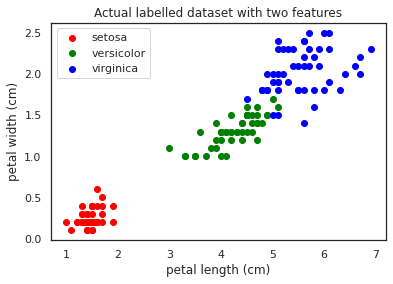

In [ ]:
# Fix two features to plot and color of the target classes
feature1 = 'petal length (cm)'
feature2 = 'petal width (cm)'
target = df['species'].unique()
color = np.array(['red','green','blue'])

# Plot the two features according to the target class
for i in range(0,len(target)):
  plt.scatter(x=df.loc[df['species']==target[i]][feature1],
              y=df.loc[df['species']==target[i]][feature2], 
              c=color[i], label=target[i])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Actual labelled dataset with two features")
plt.legend(loc='upper left')
plt.show()

Open your iris flower database (i.e. the csv file) and look at the petal length and petal width plot above and see if the above data representation matches your expectation. 

In [ ]:
# Initialize X, y and K-Means clustering model (here we only use two features)
kmeans = KMeans(n_clusters=3,random_state=0)
X = df.iloc[:,2:4] #Two features
y = df.iloc[:,-1] #Target species

# Fit K-Means model to the features https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans.fit(X)
kmeans.labels_ #Note: the cluster labels here are arbitrary, the numbers just mean different clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Unlike previous labs, here our model.fit command takes only one input X and not a reference Y because K-means is an unsupervised method.

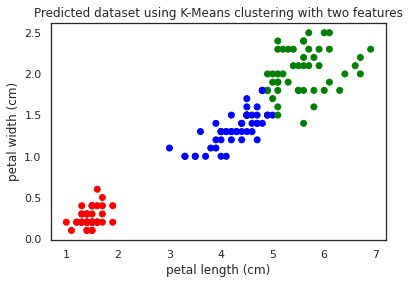

In [ ]:
# Plot the clusters 
# Fix two features to plot and color of the clusters
feature1 = 'petal length (cm)'
feature2 = 'petal width (cm)'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary

# Plot the two features according to the target class
plt.scatter(x=df[feature1], y=df[feature2], c=color[kmeans.labels_])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using K-Means clustering with two features")
plt.show()

**Task 1:** Use the other two features in the iris database and apply K-means clustering on it as was done in the step above. Display the predicted dataset using K-Means clustering with the help of Scikit-Learn. 

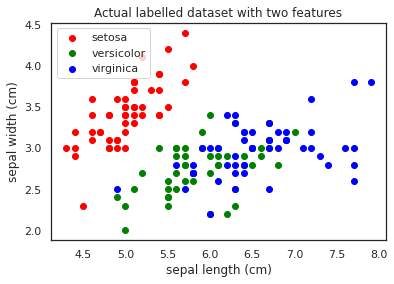

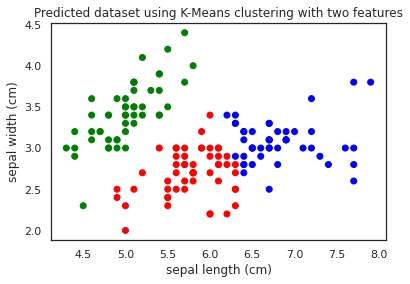

In [2]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'],
                 columns=iris['feature_names'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# Shape of dataset
df.shape

# Fix two features to plot and color of the target classes
feature1 = 'sepal length (cm)'
feature2 = 'sepal width (cm)'
target = df['species'].unique()
color = np.array(['red','green','blue'])

# Plot the two features according to the target class
for i in range(0,len(target)):
  plt.scatter(x=df.loc[df['species']==target[i]][feature1],
              y=df.loc[df['species']==target[i]][feature2], 
              c=color[i], label=target[i])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Actual labelled dataset with two features")
plt.legend(loc='upper left')
plt.show()

# Initialize X, y and K-Means clustering model (here we only use two features)
kmeans = KMeans(n_clusters=3,random_state=0)
X = df.iloc[:,0:2] #Two features
y = df.iloc[:,-1] #Target species

# Fit K-Means model to the features https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans.fit(X)
kmeans.labels_ #Note: the cluster labels here are arbitrary, the numbers just mean different clusters

# Plot the clusters 
# Fix two features to plot and color of the clusters
feature1 = 'sepal length (cm)'
feature2 = 'sepal width (cm)'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary

# Plot the two features according to the target class
plt.scatter(x=df[feature1], y=df[feature2], c=color[kmeans.labels_])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using K-Means clustering with two features")
plt.show()

**Step 2: Theory of K Means Clustering using elbow method**

K-means is a distance-based model and is one of the most popular clustering algorithms due to its simplicity and computation efficiency. We saw how it works in the above step and task. However, it also has several limitations as discussed in the lecture and one of the limitation is to decide the optimal *K*.

Now, how do we pick the optimal number of clusters, *K*, if there is no information about the number of classification groups available?

One common approach is the 'elbow ' method. The elbow method runs K-means clustering on the dataset for a range of values for *K* (say from 1-10) and then for each value of *K* computes a score for all clusters. By default, the distortion score is computed, which is the sum of square distances from each point to its assigned center (or centroid). 

The *K* that results in the best improvement (i.e. reducing) the distortion score is usually picked.


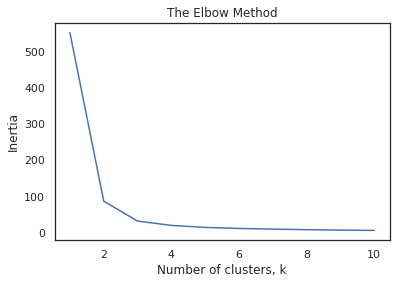

In [ ]:
X = df.iloc[:,2:4] #Two features are being considered 
k_inertia = []
#Inertia: It is the sum of squared distances of samples to their closest cluster center.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    k_inertia.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center, i.e. how close/far away the points within a cluster are, thus inertia is a measure of how well the data is clustered
plt.plot(range(1, 11), k_inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the above data, we conclude that the optimal number of clusters for the data is 3.

**Task 2:**  Using 'elbow' method to find the number of cluster (classes) in the rice classification database. 



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


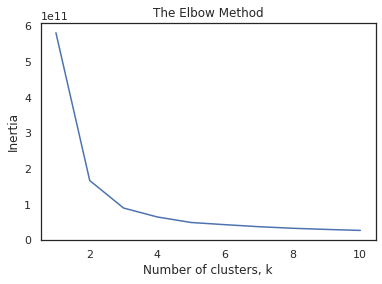

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

ricedataset = '/content/gdrive/MyDrive/CS306/database/numerical/riceClassification.csv' # google drive path where the dataset is stored 
rice = pd.read_csv(ricedataset) 
rice.shape

X = rice.iloc[:,:-1].values
# y = rice.iloc[:,-1].values
# y=np.ravel(y,order='F')
# print(X)
# print(y)

k_inertia = []
#Inertia: It is the sum of squared distances of samples to their closest cluster center.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    k_inertia.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center, i.e. how close/far away the points within a cluster are, thus inertia is a measure of how well the data is clustered
plt.plot(range(1, 11), k_inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

**Step 3: Principal Component Analysis (PCA)**

*   What happens if there are a lot more features/variables? Too many features may lead to an adverse result in clustering as discussed in the lecture.

In such cases we can use Principal Components Analysis (PCA).

PCA is a technique commonly used for reducing the dimensionality of data while preserving as much as possible of the information contained in the original data. PCA achieves this goal by projecting data onto a lower-dimensional subspace that retains most of the variance among the data points.

The main idea behind PCA is to figure out patterns and correlations among various features in the dataset. On finding a strong correlation between different variables, a final decision is made about reducing the dimensions of the data in such a way that the significant data is still retained.


Usual steps involved in PCA:

-  Standardization of the data
-  Computing the covariance matrix
-  Calculating the eigenvectors and eigenvalues
-  Computing the Principal Components
-  Reducing the dimensions of the data set


We have seen what standardization of the data is in the previous labs. So let us look at some more details of the remaining steps. 

- Computing the Covariance Matrix: 

A covariance matrix expresses the correlation between the different variables in the dataset. It is preferrable to identify heavily correlated variables because they contain redundant information which may reduce the overall performance of the model.

Mathematically, a covariance matrix is a *p × p* matrix, where *p* represents the dimensions of the dataset. Each entry in the matrix represents the covariance of the corresponding variables.

Consider a case where we have a 2-Dimensional dataset with variables a and b, the covariance matrix is a 2×2 matrix as shown below:

\begin{bmatrix}
Cov(a,a) & Cov(a,b)\\
Cov(b,a) & Cov(b,b)
\end{bmatrix}

In the above matrix:

$Cov(a, a)$ represents the covariance of a variable with itself, which is nothing but the variance of the variable $‘a’$. 
$Cov(a, b)$ represents the covariance of the variable $‘a’$ with respect to the variable $‘b’$. And since covariance is commutative, $Cov(a, b)$ = $Cov(b, a)$

The covariance value denotes how co-dependent two variables are with respect to each other. If the covariance value is negative, it denotes the respective variables are indirectly proportional to each other.  A positive covariance denotes that the respective variables are directly proportional to each other. 

- Calculating the Eigenvectors and Eigenvalues:

Eigenvectors and Eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to determine the principal components of the data set and principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly obtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables.

- Computing the Principal Components:

Once the Eigenvectors and Eigenvalues are computed, they are ordered in the descending order, where the Eigenvector with the highest Eigenvalue is the most significant and thus forms the first principal component. In this order, principal components of lesser significances can thus be removed in order to reduce the dimensions of the data.

- Reducing the Dimensions of the Dataset:

The last step in performing PCA is to re-arrange (or transform) the original data with the selected principal components which represent the most significant information of the dataset.

Let us implement this using Python libraries.  Before we do that we will use seaborn.pairplot library to show pairwise relationships in our dataset. 

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. More information about this can be found on https://seaborn.pydata.org/generated/seaborn.pairplot.html 


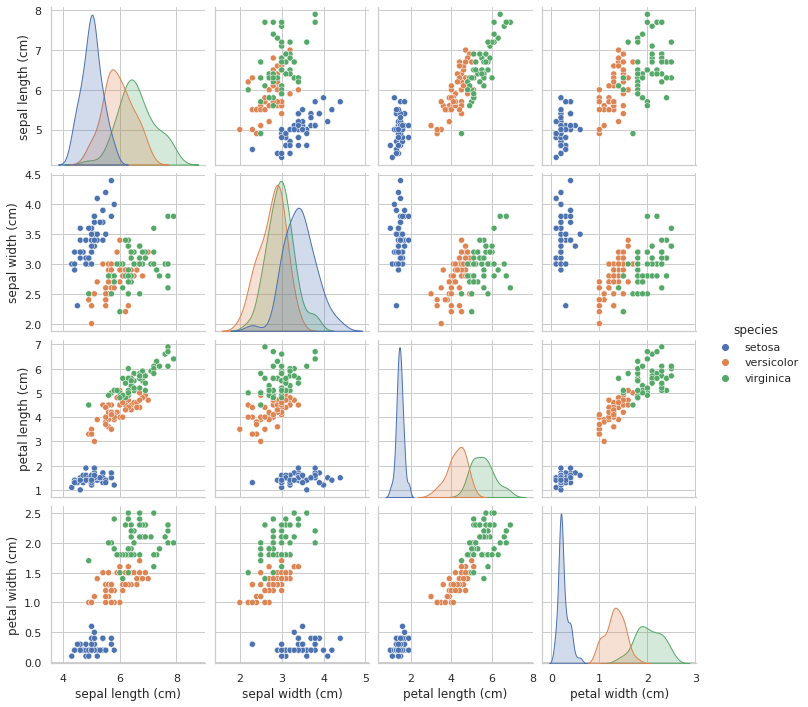

In [ ]:
# Plot scatter plot for each combination of features
sns.set_style("whitegrid")
sns.pairplot(df,hue="species");
plt.show()

In [ ]:
# Now that we know how to choose the optimal number of clusters, how do we know which are the best features?
# It's hard to find the 'best' features that can separate the data well enough for clustering to be effective
# One unsupervised method that can help is PCA, which finds the correlation between features to form principal components. These principal components can then be used as features.
# PCA is also a great visualization tool when you have a lot of features as you can use the first two principal components for a scatter plot


iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'],
                 columns=iris['feature_names'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Apply PCA on all four features
X = df.iloc[:,:-1] # All features without target

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
# Percentage of variance explained for each components
print("explained variance ratio (first two components): ", str(pca.explained_variance_ratio_))


explained variance ratio (first two components):  [0.92461872 0.05306648]


In [ ]:
# Make a dataframe of PCs and target
df_pca = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
df_pca['species'] = df['species']
df_pca.head()

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


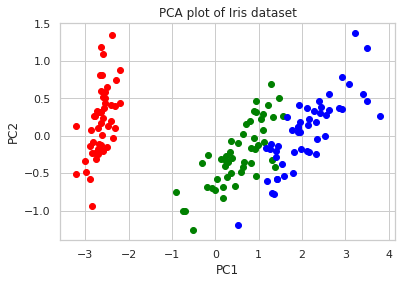

In [ ]:
target = df['species'].unique()
color = np.array(['red','green','blue'])

# Plot the two features according to the target class
for i in range(0,len(target)):
  plt.scatter(x=df_pca.loc[df_pca['species']==target[i]]['PC1'], 
              y=df_pca.loc[df_pca['species']==target[i]]['PC2'], 
              c=color[i], label=target[i])
# Label axes, title and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA plot of Iris dataset")
plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


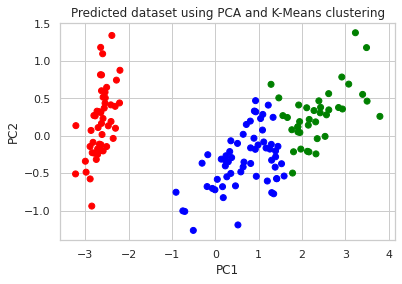

In [ ]:
# The principal components can be used as features for K-Means clustering
# Initialize X, y (here we use the first two PCs as input)
X = df_pca.iloc[:,:-1] #Two PCs
y = df.iloc[:,-1] #Target species

# Fit K-Means model using PCs as features
kmeans = KMeans(n_clusters=3,random_state=0).fit(X)
print(kmeans.labels_) #Note: the cluster labels here are arbitrary, the numbers just mean different clusters

# Visualize the clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[kmeans.labels_])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and K-Means clustering")
plt.show()

**Task 3:**  Using the Rice classification dataset provided on Canvas, perform the following.  

1. Apply K means clustering using the features MajorAxisLength and MinorAxisLength in the database and show the K means clustering prediction. 

2. Apply PCA on Rice classification dataset and display the PCA plot.

3. Once PCA is applied, use K-means clustering on the principal components and display the predicted dataset. 

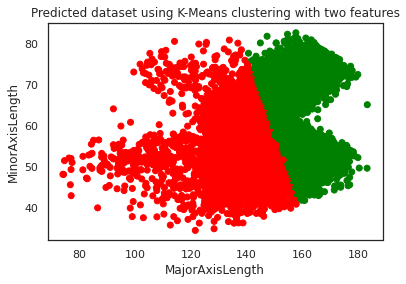

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# Now that we know how to choose the optimal number of clusters, how do we know which are the best features?
# It's hard to find the 'best' features that can separate the data well enough for clustering to be effective
# One unsupervised method that can help is PCA, which finds the correlation between features to form principal components. These principal components can then be used as features.
# PCA is also a great visualization tool when you have a lot of features as you can use the first two principal components for a scatter plot
ricedataset = '/content/gdrive/MyDrive/CS306/database/numerical/riceClassification.csv' # google drive path where the dataset is stored 
rice = pd.read_csv(ricedataset) 


kmeans = KMeans(n_clusters=2,random_state=0)
X = rice.iloc[:,2:4] # Two features (MajorAxisLength and MiniorAxisLength)
y= rice.iloc[:,-1] #Target Class

# print(X)
# print(y)

kmeans.fit(X)
kmeans.labels_

feature1 = 'MajorAxisLength'
feature2 = 'MinorAxisLength'
color = np.array(['red','green','blue'])
# Plot the two features according to the target class
plt.scatter(x=df[feature1], y=df[feature2], c=color[kmeans.labels_])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using K-Means clustering with two features")
plt.show()




explained variance ratio (first two components):  [0.93674456 0.06320222]
            PC1          PC2  Class
0   9738.735592   756.139045      1
1  10425.840917  3006.654892      1
2  10364.434380  2809.341192      1
3  10353.138434  2775.819284      1
4  10090.524128  1920.351164      1


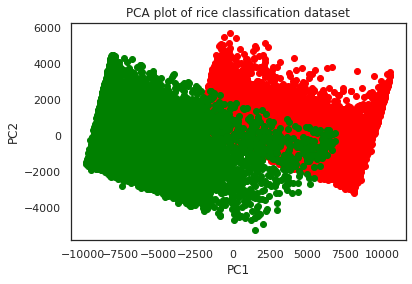

In [83]:
X = rice.iloc[:,:-1] # All features without target
#print(X)

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
# Percentage of variance explained for each components
print("explained variance ratio (first two components): ", str(pca.explained_variance_ratio_))

#=========================================================
# Make a dataframe of PCs and target
df_pca = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
df_pca['Class'] = df['Class']
print(df_pca.head())

target = df['Class'].unique()
color = np.array(['red','green','blue'])

# Plot the two features according to the target class
for i in range(0,len(target)):
  plt.scatter(x=df_pca.loc[df_pca['Class']==target[i]]['PC1'], 
              y=df_pca.loc[df_pca['Class']==target[i]]['PC2'], 
              c=color[i], label=target[i])
# Label axes, title and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.ylim(-1000,1000)
plt.title("PCA plot of rice classification dataset")
plt.show()




[0 0 0 ... 1 1 1]


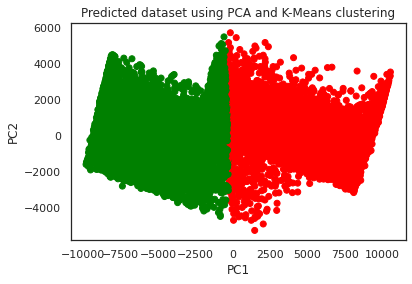

In [84]:
#=========================================================
# The principal components can be used as features for K-Means clustering
# Initialize X, y (here we use the first two PCs as input)
X = df_pca.iloc[:,:-1] #Two PCs
y = rice.iloc[:,-1] #Target species

# Fit K-Means model using PCs as features
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)
print(kmeans.labels_) #Note: the cluster labels here are arbitrary, the numbers just mean different clusters

# Visualize the clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[kmeans.labels_])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and K-Means clustering")
plt.show()

**Step 4: Gaussian Mixture Modelling (GMM)**


Gaussian Mixture Modelling (GMM) is a type of clustering algorithm. As its name implies, each cluster is modelled according to a different Gaussian distribution. This is probabilistic approach for modelling the data, which means that rather than having hard assignments into a specific cluster (like K-means), GMM has soft assignments with probability memberships to mutliple clusters. This means that each data point could have been generated by multiple Gaussian distributions (i.e. clusters) with a corresponding probability. In effect, each distribution has some ‘responsibility’ for generating a particular data point.

Now let us visualize how GMM clustering works using Python libraries.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


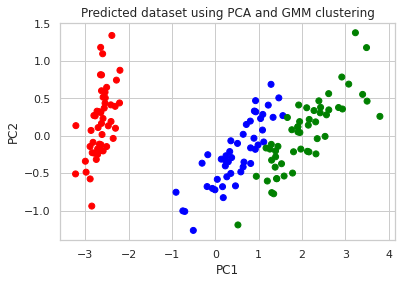

In [ ]:
# From the labelled PCA plot in step 3, we see that the actual groups are oblong in shape
# Here, K-Means clustering do not perform as well since they work best for circular clusters
# We look at a different type of clustering, GMM

iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'],
                 columns=iris['feature_names'])


# Initialize X, y (here we use the first two PCs as input)
X = df_pca.iloc[:,:-1] #Two PCs
y = df.iloc[:,-1] #Target species

# Perform GMM https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(X)
gm_labels = gm.predict(X)
print(gm_labels)

# Visualize the GMM clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[gm_labels])
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and GMM clustering")
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


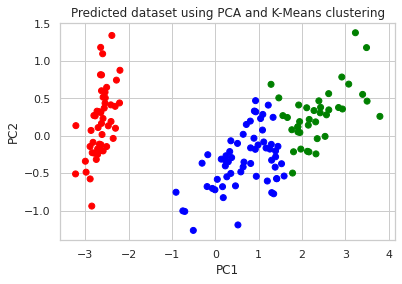

In [ ]:
# The principal components can be used as features for K-Means clustering
# Initialize X, y (here we use the first two PCs as input)
X = df_pca.iloc[:,:-1] #Two PCs
y = df.iloc[:,-1] #Target species

# Fit K-Means model using PCs as features
kmeans = KMeans(n_clusters=3,random_state=0).fit(X)
print(kmeans.labels_) #Note: the cluster labels here are arbitrary, the numbers just mean different clusters

# Visualize the clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[kmeans.labels_])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and K-Means clustering")
plt.show()

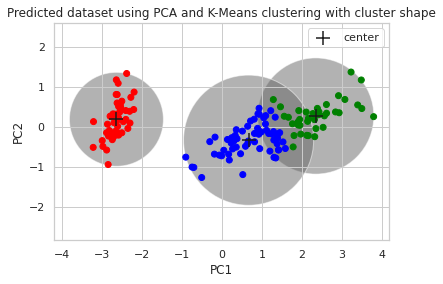

In [ ]:
# Visualize cluster shape (K-Means) https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
from scipy.spatial.distance import cdist
X = df_pca.iloc[:,:-1] #Two PCs
y = df.iloc[:,-1] #Target species

feature1 = 'PC1'
feature2 = 'PC2'
labels = kmeans.labels_
centers = kmeans.cluster_centers_
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary

fig, ax = plt.subplots()
ax.axis('equal')
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[kmeans.labels_])

# Plot the representation of the K-Means model
radii = [cdist(X[labels == i], [center]).max()
          for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#666666', alpha=0.5, zorder=-1))
# Plot center of cluster
plt.scatter(centers[:,0],centers[:,1],s=200, c = 'k' ,marker = '+', label='center')

# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and K-Means clustering with cluster shape")
plt.legend()
plt.show()

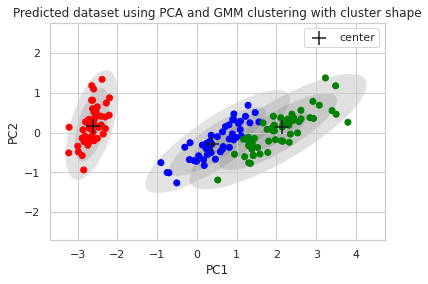

In [ ]:

from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.axis('equal')
# Visualize the clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
X = df_pca.iloc[:,:-1] #Two PCs
y = df.iloc[:,-1] #Target species
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[gm_labels])

# Representation of GMM cluster (code from https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs, fc='#666666', zorder=-1))
w_factor = 0.2 / gm.weights_.max()
for pos, covar, w in zip(gm.means_, gm.covariances_, gm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

# Center of cluster https://stackoverflow.com/questions/47412749/how-can-i-get-a-representative-point-of-a-gmm-cluster
centers = np.empty(shape=(gm.n_components, X.shape[1]))
for i in range(gm.n_components):
    density = multivariate_normal(cov=gm.covariances_[i], mean=gm.means_[i]).logpdf(X)
    centers[i, :] = X.iloc[np.argmax(density)]
plt.scatter(centers[:,0],centers[:,1],s=200, c = 'k' ,marker = '+', label='center')

# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and GMM clustering with cluster shape")
plt.legend()
plt.show()

**Task 4:** Use the above step to guide you to do the following 

1. Apply GMM and PCA on the Rice classification dataset and show the Predicted dataset

2. Apply PCA and GMM clustering on the Rice classification dataset and show the Predicted dataset with cluster shape (GMM clustering cluster shape).

[0 0 0 ... 1 1 1]


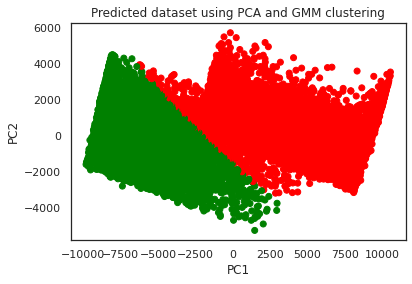

In [94]:
X = df_pca.iloc[:,:-1] #Two PCs
y = rice.iloc[:,-1] #Target species

# Perform GMM https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm_labels = gm.predict(X)
print(gm_labels)

# Visualize the GMM clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[gm_labels])
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and GMM clustering")
plt.show()

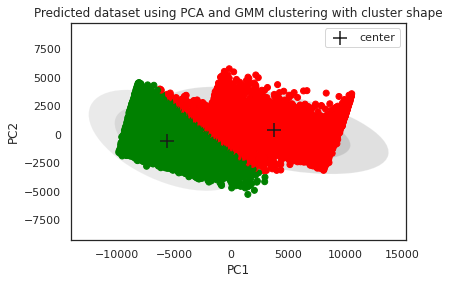

In [95]:
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
ax.axis('equal')
# Visualize the clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
X = df_pca.iloc[:,:-1] #Two PCs
y = df.iloc[:,-1] #Target species
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[gm_labels])

# Representation of GMM cluster (code from https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs, fc='#666666', zorder=-1))
w_factor = 0.2 / gm.weights_.max()
for pos, covar, w in zip(gm.means_, gm.covariances_, gm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

# Center of cluster https://stackoverflow.com/questions/47412749/how-can-i-get-a-representative-point-of-a-gmm-cluster
centers = np.empty(shape=(gm.n_components, X.shape[1]))
for i in range(gm.n_components):
    density = multivariate_normal(cov=gm.covariances_[i], mean=gm.means_[i]).logpdf(X)
    centers[i, :] = X.iloc[np.argmax(density)]
plt.scatter(centers[:,0],centers[:,1],s=200, c = 'k' ,marker = '+', label='center')

# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and GMM clustering with cluster shape")
plt.legend()
plt.show()

**Task 5:** Using breast cancer dataset that can be imported using the code block below, perform the operations listed.






In [101]:
# Load breast cancer dataset into one dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
breast_cancer = datasets.load_breast_cancer()
df_cancer = pd.DataFrame(data=breast_cancer['data'],
                 columns=breast_cancer['feature_names'])

df_cancer['target'] = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
print(df_cancer)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

**a)** Identify the target variable

In [102]:
#code to arrive till target variable identification
target = df_cancer['target'].unique()
#y= df_cancer.iloc[:,-1]
print(target)
#print(y)

['malignant', 'benign']
Categories (2, object): ['malignant', 'benign']


**b)** Identify the features/attributes

In [103]:
# Features
X = df_cancer.drop('target',axis=1)
print(X)

for col in X.columns:
  print(col)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

**c)** Choose 2 features to visualize the target classes and display the same
Perform k-means clustering using all the features and display the predicted dataset

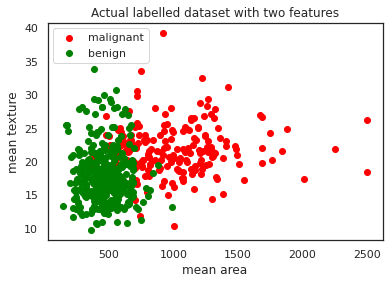

In [104]:
# Choose any two features for visualization of the target classess

feature1 = 'mean area'
feature2 = 'mean texture'
color = np.array(['red','green','blue'])

# Plot the two features according to the target class
for i in range(0,len(target)):
  plt.scatter(x=df_cancer.loc[df_cancer['target']==target[i]][feature1],
              y=df_cancer.loc[df_cancer['target']==target[i]][feature2], 
              c=color[i], label=target[i])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Actual labelled dataset with two features")
plt.legend(loc='upper left')
plt.show()

**d)** Perform  k-means clustering and plot the predicted output.

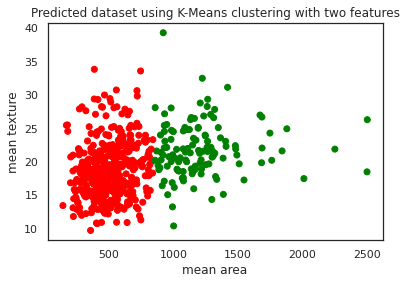

In [105]:
X= df_cancer.iloc[:,2:4] #using two features
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)
kmeans.labels_
color = np.array(['red','green'])
plt.scatter(x=df_cancer[feature1], y=df_cancer[feature2], c=color[kmeans.labels_])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using K-Means clustering with two features")
plt.show()


**e)** Using 'elbow' method, plot the k-means distance curve graph and mention the optimal number of clusters 

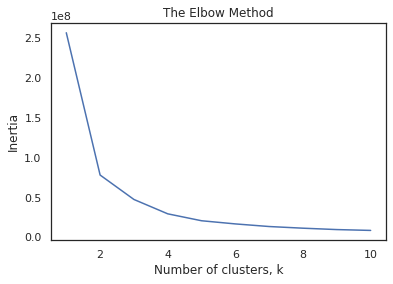

In [106]:
X = df_cancer.iloc[:,:-1] #Two features are being considered 
k_inertia = []
#Inertia: It is the sum of squared distances of samples to their closest cluster center.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    k_inertia.append(kmeans.inertia_) #Sum of squared distances of samples to their closest cluster center, i.e. how close/far away the points within a cluster are, thus inertia is a measure of how well the data is clustered
plt.plot(range(1, 11), k_inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()


**f)** Display the scatter plot using 3 features.

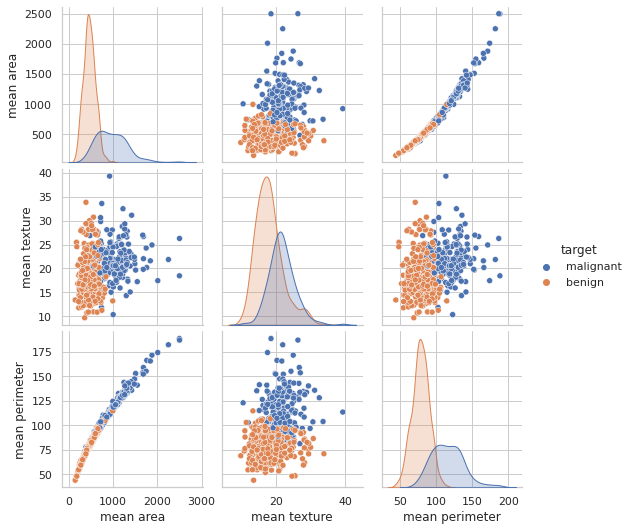

In [107]:
sns.set_style("whitegrid")
sns.pairplot(
    df_cancer,
    x_vars=["mean area", "mean texture", "mean perimeter"],
    y_vars=["mean area", "mean texture", "mean perimeter"],
    hue="target"
             )
plt.show()



**g)** Use PCA to obtain the best features. 

In [114]:
X = df_cancer.iloc[:,:-1] # All features without target

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)
# Percentage of variance explained for each components
print("explained variance ratio (first two components): ", str(pca.explained_variance_ratio_))

# Make a dataframe of PCs and target
df_pca = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
df_pca['target'] = df_cancer['target']
df_pca.head()

explained variance ratio (first two components):  [0.98204467 0.01617649]


,PC1,PC2,target
0,1160.142574,-293.917544,malignant
1,1269.122443,15.630182,malignant
2,995.793889,39.156743,malignant
3,-407.180803,-67.380320,malignant
4,930.341180,189.340742,malignant


**h)** Use sns.heatmap() to how much each feature contributes or correlates with PCA.

In [118]:
#print(pca.components_)
df_pcacomponents = pd.DataFrame(data=pca.components_, columns= df_cancer.columns[:-1])
print(df_pcacomponents)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.005086      0.002197        0.035076   0.516826         0.000004   
1     0.009287     -0.002882        0.062748   0.851824        -0.000015   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.000041        0.000082             0.000048       0.000007   
1         -0.000003        0.000075             0.000046      -0.000025   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0               -0.000003  ...      0.007155       0.003067         0.049458   
1               -0.000016  ...     -0.000569      -0.013215        -0.000186   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.852063          0.000006           0.000101         0.000169   
1   -0.519742         -0.000077          -0.000256        -0.000175   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.000074

Text(0.5, 1.0, 'Correlation between features and PCA variables')

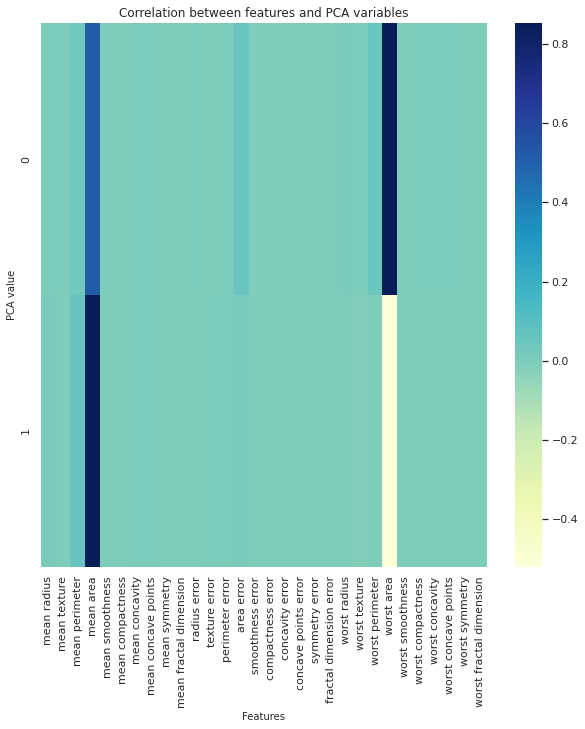

In [122]:

plt.figure(figsize=(10,10))

s= sns.heatmap(df_pcacomponents,cmap="YlGnBu")
s.set_xlabel('Features', fontsize=10)
s.set_ylabel('PCA value', fontsize=10)
plt.title("Correlation between features and PCA variables")


**i)** Show the PCA plot of breast cancer dataset 

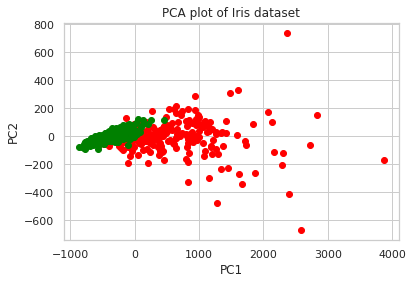

In [44]:
target = df_cancer['target'].unique()
color = np.array(['red','green','blue'])

# Plot the two features according to the target class
for i in range(0,len(target)):
  plt.scatter(x=df_pca.loc[df_pca['target']==target[i]]['PC1'], 
              y=df_pca.loc[df_pca['target']==target[i]]['PC2'], 
              c=color[i], label=target[i])
# Label axes, title and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA plot of Iris dataset")
plt.show()

**j)** Plot the predicted output using PCA and K-Means clustering

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

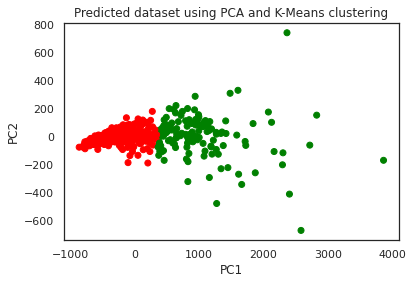

In [66]:
# The principal components can be used as features for K-Means clustering
# Initialize X, y (here we use the first two PCs as input)
X = df_pca.iloc[:,:-1] #Two PCs
y = df_cancer.iloc[:,-1] #Target species

# Fit K-Means model using PCs as features
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)
print(kmeans.labels_) #Note: the cluster labels here are arbitrary, the numbers just mean different clusters

# Visualize the clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[kmeans.labels_])
  
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and K-Means clustering")
plt.show()

**k)** Plot the predicted output using PCA and GMM clustering

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 1 1 

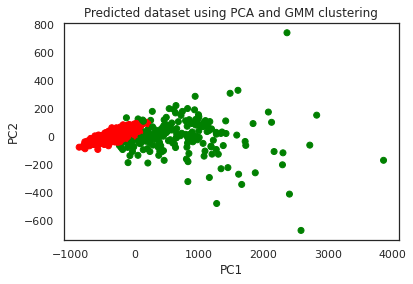

In [67]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm_labels = gm.predict(X)
print(gm_labels)

# Visualize the GMM clusters
# Fix two features to plot and color of the clusters
feature1 = 'PC1'
feature2 = 'PC2'
color = np.array(['red','green','blue']) #Note: the colors might be different as the cluster labels are arbitrary
plt.scatter(x=df_pca[feature1], y=df_pca[feature2], c=color[gm_labels])
# Label axes, title and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Predicted dataset using PCA and GMM clustering")
plt.show()

**Quiz**

Question 1: Which option is not the characteristic of K-means clustering?

In [ ]:
Answer1 = "Each data point can be assigned to multiple clusters" #@param ["Need to decide the number of clusters (i.e. K) before starting the algorithm", "Each data point can be assigned to multiple clusters", "The optimal value of K can be found using the elbow method"] {allow-input: true}


Question 2: What is the purpose of principal component analysis?

In [ ]:
Answer2 = "Trasnforming input variables to a lower dimensional space" #@param ["Transforming input variables to a higher dimensional space", "Trasnforming input variables to a lower dimensional space"] {allow-input: true}


Question 3: Which option is true for clustering algorithms?

In [ ]:
Answer3 = "More features may introduce redundant or irrelevant features that have adverse impact to clustering result" #@param ["More features allows clusters to be found more easily", "More features allows less data points to be used by clustering methods", "More features may introduce redundant or irrelevant features that have adverse impact to clustering result"] {allow-input: true}


Question 4: Which option is not the characteristic of GMM clustering?

In [ ]:
Answer4 = "GMM is a distance based clustering" #@param ["Data points can have probabilitic membership to multiple clusters", "GMM clusters does not need to be circular (or hyper sphere)", "GMM is a distance based clustering"] {allow-input: true}
